#Extracting Info from the XML Files

In [140]:
!pip install tqdm torch torchvision

In [141]:

import os
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import xml.etree.ElementTree as ET
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer


In [142]:
columns = ["image_id", "caption","comparision","indication","findings","impression","height","width"]
df = pd.DataFrame(columns=columns)
patient_img = {}


for file in tqdm(os.listdir("./ecgen-radiology/")):
    if file.endswith(".xml"):
        k = "ecgen-radiology/"
        path = k + file
        mytree = ET.parse(path)# parsing xml report
        comparision = mytree.find(".//AbstractText[@Label='COMPARISON']").text # extracting comaparison text
        indication = mytree.find(".//AbstractText[@Label='INDICATION']").text #extracting indication text
        findings = mytree.find(".//AbstractText[@Label='FINDINGS']").text # extracting findings text
        impression = mytree.find(".//AbstractText[@Label='IMPRESSION']").text  # extracting impression text

        mytree = ET.parse(path)
        root = mytree.getroot()
        pmcId = root.find(".//uId").attrib["id"]
        count = 0
        for x in mytree.findall("parentImage"):
            image_id = x.attrib['id']+".png"
            filename = 'NLMCXR_png/' + image_id
            image = cv2.imread(filename) # reading image
             
            height, width, channels = image.shape
            caption = '' if x.find('caption').text is None else x.find('caption').text
            image_path = 'NLMCXR_png/'+ image_id
     
            row = pd.DataFrame([{
                "image_id": image_id,
                "caption": caption,
                "comparision": comparision,
                "indication": indication,
                "findings": findings,
                "impression": impression,
                "height": height,
                "width": width,
                "image_path": image_path
            }])

                                                         
            df = pd.concat([df, row], ignore_index = True)
            count+=1
        patient_img[pmcId]=count
        


100%|██████████| 3955/3955 [00:18<00:00, 210.89it/s]


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470 entries, 0 to 7469
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_id     7470 non-null   object
 1   caption      7470 non-null   object
 2   comparision  6313 non-null   object
 3   indication   7311 non-null   object
 4   findings     6473 non-null   object
 5   impression   7418 non-null   object
 6   height       7470 non-null   object
 7   width        7470 non-null   object
 8   image_path   7470 non-null   object
dtypes: object(9)
memory usage: 525.4+ KB


In [144]:
df.describe()


,image_id,caption,comparision,indication,findings,impression,height,width,image_path
count,7470,7470,6313,7311,6473,7418,7470,7470,7470
unique,7470,697,394,2454,2553,1770,304,1,7470
top,CXR162_IM-0401-1001.png,Xray Chest PA and Lateral,None.,Chest pain,The heart is normal in size. The mediastinum i...,No acute cardiopulmonary abnormality.,624,512,NLMCXR_png/CXR162_IM-0401-1001.png
freq,1,2363,1592,253,98,586,1983,7470,1


In [145]:
df.head(10)

,image_id,caption,comparision,indication,findings,impression,height,width,image_path
0,CXR162_IM-0401-1001.png,PA and lateral chest.,None.,XXXX.,Heart size normal. Lungs are clear. XXXX are n...,Normal chest,420,512,NLMCXR_png/CXR162_IM-0401-1001.png
1,CXR162_IM-0401-2001.png,PA and lateral chest.,None.,XXXX.,Heart size normal. Lungs are clear. XXXX are n...,Normal chest,624,512,NLMCXR_png/CXR162_IM-0401-2001.png
2,CXR1390_IM-0249-1001.png,PA and lateral chest x-XXXX XXXX,None,"Slipped , XXXX back on right side",The heart size and pulmonary vascularity appea...,No evidence of active disease.,512,512,NLMCXR_png/CXR1390_IM-0249-1001.png
3,CXR1390_IM-0249-2001.png,PA and lateral chest x-XXXX XXXX,None,"Slipped , XXXX back on right side",The heart size and pulmonary vascularity appea...,No evidence of active disease.,512,512,NLMCXR_png/CXR1390_IM-0249-2001.png
4,CXR604_IM-2193-1001.png,PA and Lateral Chest X-XXXX dated XXXX.,XXXX.,Bone marrow transplant evaluation. AML.,The heart size and pulmonary vascularity appea...,1. No evidence of active disease.,512,512,NLMCXR_png/CXR604_IM-2193-1001.png
5,CXR604_IM-2193-2001.png,PA and Lateral Chest X-XXXX dated XXXX.,XXXX.,Bone marrow transplant evaluation. AML.,The heart size and pulmonary vascularity appea...,1. No evidence of active disease.,615,512,NLMCXR_png/CXR604_IM-2193-2001.png
6,CXR2699_IM-1167-1001.png,Xray Chest PA and Lateral,None.,XXXX year old chest pain and XXXX.,The heart is normal in size and contour. The l...,No acute cardiopulmonary disease.,443,512,NLMCXR_png/CXR2699_IM-1167-1001.png
7,CXR2699_IM-1167-2001.png,Xray Chest PA and Lateral,None.,XXXX year old chest pain and XXXX.,The heart is normal in size and contour. The l...,No acute cardiopulmonary disease.,497,512,NLMCXR_png/CXR2699_IM-1167-2001.png
8,CXR2841_IM-1253-2001.png,Xray Chest PA and Lateral,None.,XXXX year old mid to lower back pain since XXXX.,The heart is normal in size and contour. The l...,No acute cardiopulmonary disease.,557,512,NLMCXR_png/CXR2841_IM-1253-2001.png
9,CXR3587_IM-1765-1001.png,Chest X-XXXX 2 XXXX,XXXX,XXXX for one XXXX.,The lungs are clear. The cardiomediastinal sil...,Negative chest .,420,512,NLMCXR_png/CXR3587_IM-1765-1001.png


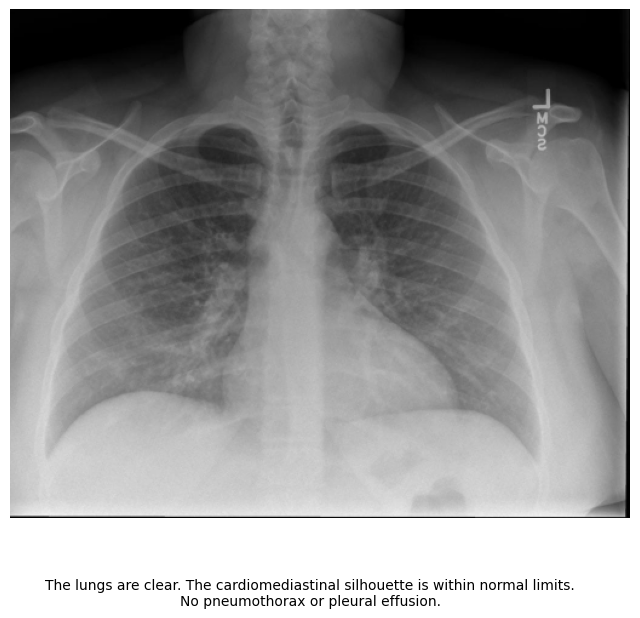

In [146]:
# import textwrap

# plt.figure(figsize=(8, 7))
# img = cv2.imread(df['image_path'].values[9])
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
# plt.axis('off')

# findings = "\n".join(textwrap.wrap(df['findings'].values[9], width=80))
# plt.figtext(0.5, 0.01, findings, wrap=True, ha='center', fontsize=10)

# plt.show()


import os
import cv2
import textwrap
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

# Define transformation pipeline for preprocessing image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match CNN input dimensions
    transforms.Grayscale(num_output_channels=1),  # Convert to single-channel grayscale
    transforms.ToTensor(),  # Convert to tensor and scale to [0, 1]
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] range
])

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    try:
        image = Image.open(image_path).convert("RGB")  # Ensure 3 channels before grayscale
        image = transform(image)
        return image
    except Exception as e:
        print(f"Error loading {image_path}: {e}")
        return None

# Load the image and process for display
image_path = df['image_path'].values[9]
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(8, 7))
plt.imshow(img)
plt.axis('off')

# Process findings text
findings = "\n".join(textwrap.wrap(df['findings'].values[9], width=80))
plt.figtext(0.5, 0.01, findings, wrap=True, ha='center', fontsize=10)

# Show the image with findings
plt.show()

# Load and preprocess image for the model (if needed)
preprocessed_image = load_and_preprocess_image(image_path)
if preprocessed_image is not None:
    # Now you can pass `preprocessed_image` to your model for inference
    pass







In [147]:
df.head(10)

,image_id,caption,comparision,indication,findings,impression,height,width,image_path
0,CXR162_IM-0401-1001.png,PA and lateral chest.,None.,XXXX.,Heart size normal. Lungs are clear. XXXX are n...,Normal chest,420,512,NLMCXR_png/CXR162_IM-0401-1001.png
1,CXR162_IM-0401-2001.png,PA and lateral chest.,None.,XXXX.,Heart size normal. Lungs are clear. XXXX are n...,Normal chest,624,512,NLMCXR_png/CXR162_IM-0401-2001.png
2,CXR1390_IM-0249-1001.png,PA and lateral chest x-XXXX XXXX,None,"Slipped , XXXX back on right side",The heart size and pulmonary vascularity appea...,No evidence of active disease.,512,512,NLMCXR_png/CXR1390_IM-0249-1001.png
3,CXR1390_IM-0249-2001.png,PA and lateral chest x-XXXX XXXX,None,"Slipped , XXXX back on right side",The heart size and pulmonary vascularity appea...,No evidence of active disease.,512,512,NLMCXR_png/CXR1390_IM-0249-2001.png
4,CXR604_IM-2193-1001.png,PA and Lateral Chest X-XXXX dated XXXX.,XXXX.,Bone marrow transplant evaluation. AML.,The heart size and pulmonary vascularity appea...,1. No evidence of active disease.,512,512,NLMCXR_png/CXR604_IM-2193-1001.png
5,CXR604_IM-2193-2001.png,PA and Lateral Chest X-XXXX dated XXXX.,XXXX.,Bone marrow transplant evaluation. AML.,The heart size and pulmonary vascularity appea...,1. No evidence of active disease.,615,512,NLMCXR_png/CXR604_IM-2193-2001.png
6,CXR2699_IM-1167-1001.png,Xray Chest PA and Lateral,None.,XXXX year old chest pain and XXXX.,The heart is normal in size and contour. The l...,No acute cardiopulmonary disease.,443,512,NLMCXR_png/CXR2699_IM-1167-1001.png
7,CXR2699_IM-1167-2001.png,Xray Chest PA and Lateral,None.,XXXX year old chest pain and XXXX.,The heart is normal in size and contour. The l...,No acute cardiopulmonary disease.,497,512,NLMCXR_png/CXR2699_IM-1167-2001.png
8,CXR2841_IM-1253-2001.png,Xray Chest PA and Lateral,None.,XXXX year old mid to lower back pain since XXXX.,The heart is normal in size and contour. The l...,No acute cardiopulmonary disease.,557,512,NLMCXR_png/CXR2841_IM-1253-2001.png
9,CXR3587_IM-1765-1001.png,Chest X-XXXX 2 XXXX,XXXX,XXXX for one XXXX.,The lungs are clear. The cardiomediastinal sil...,Negative chest .,420,512,NLMCXR_png/CXR3587_IM-1765-1001.png


In [148]:
df.isnull().sum()


image_id          0
caption           0
comparision    1157
indication      159
findings        997
impression       52
height            0
width             0
image_path        0
dtype: int64

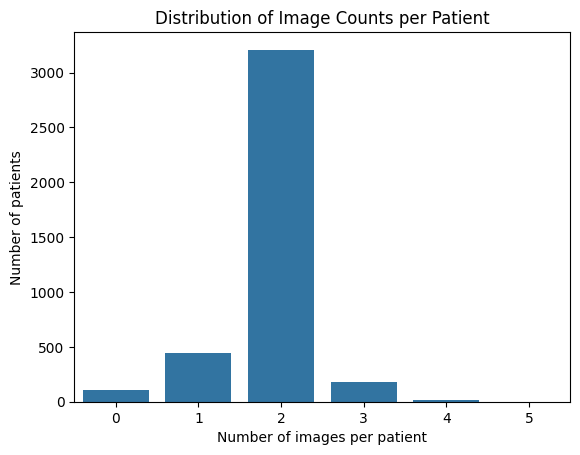

,image_count,frequency
3,0,104
1,1,446
0,2,3208
2,3,181
4,4,15
5,5,1


In [149]:
# patient_img = dict(sorted(patient_img.items(), key=lambda x: int(x[0])))
from collections import Counter

# Count frequency of image counts
count_freq = Counter(patient_img.values())

# Convert to DataFrame
df_freq = pd.DataFrame({
    'image_count': list(count_freq.keys()),
    'frequency': list(count_freq.values())
}).sort_values(by='image_count')

# Plot
sns.barplot(x='image_count', y='frequency', data=df_freq)
plt.xlabel("Number of images per patient")
plt.ylabel("Number of patients")
plt.title("Distribution of Image Counts per Patient")
plt.show()

df_freq

In [150]:
df['height'] = pd.to_numeric(df['height'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470 entries, 0 to 7469
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_id     7470 non-null   object
 1   caption      7470 non-null   object
 2   comparision  6313 non-null   object
 3   indication   7311 non-null   object
 4   findings     6473 non-null   object
 5   impression   7418 non-null   object
 6   height       7470 non-null   int64 
 7   width        7470 non-null   int64 
 8   image_path   7470 non-null   object
dtypes: int64(2), object(7)
memory usage: 525.4+ KB


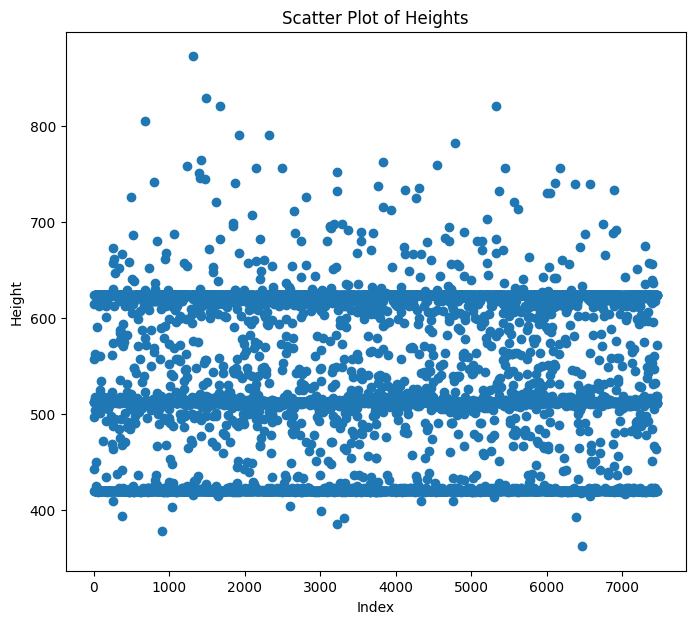

In [151]:
plt.figure(figsize=(8, 7))
plt.scatter(range(len(df)), df['height'])
plt.xlabel("Index")
plt.ylabel("Height")
plt.title("Scatter Plot of Heights")
plt.show()


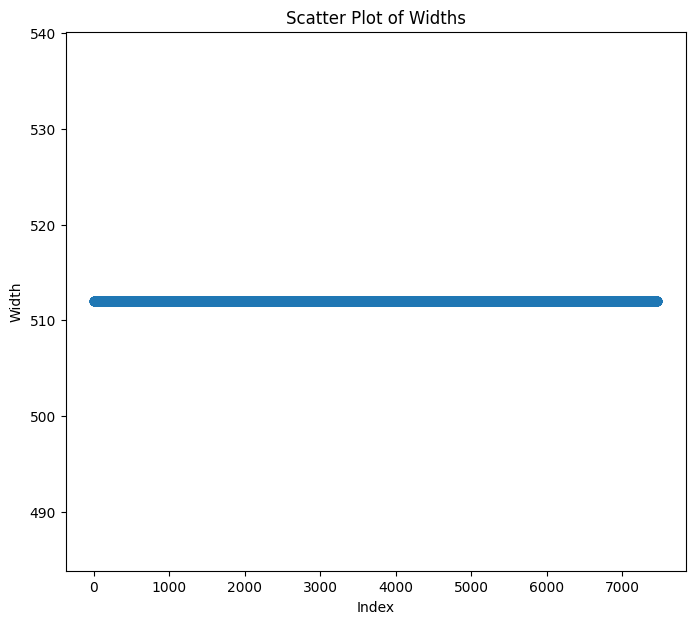

In [152]:
plt.figure(figsize=(8, 7))
plt.scatter(range(len(df)), df['width'])
plt.xlabel("Index")
plt.ylabel("Width")
plt.title("Scatter Plot of Widths")
plt.show()


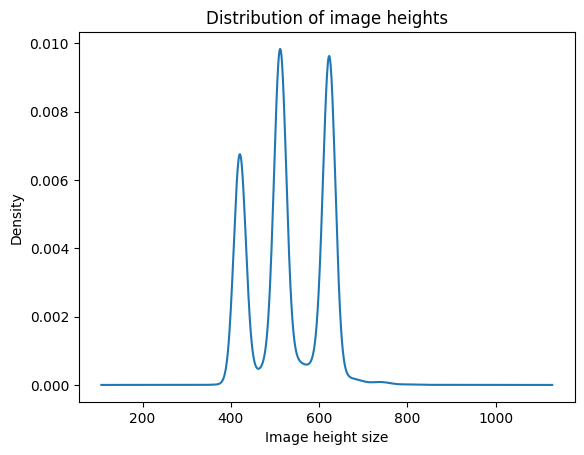



Value Counts of image heights:

height
624    1983
512    1528
420    1424
511     429
618     166
Name: count, dtype: int64


In [153]:
ax = df['height'].plot(kind='kde')
ax.set_title("Distribution of image heights")
ax.set_xlabel("Image height size")
plt.show()

print("\n\nValue Counts of image heights:\n")
print(df.height.value_counts()[:5])


In [154]:
df['findings']=df['findings'].fillna("")
df['impression']=df['impression'].fillna("")
df['indication']=df['indication'].fillna("")
df['comparision']=df['comparision'].fillna("")

In [155]:
df.isnull().sum()

image_id       0
caption        0
comparision    0
indication     0
findings       0
impression     0
height         0
width          0
image_path     0
dtype: int64

In [156]:
import re
def lowercase(text):
    '''Converts to lowercase'''
    new_text = []
    for line in text:
        new_text.append(line.lower())
    return new_text

def decontractions(text):
    '''Performs decontractions in the doc'''
    new_text = []
    for phrase in text:
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"couldn\'t", "could not", phrase)
        phrase = re.sub(r"shouldn\'t", "should not", phrase)
        phrase = re.sub(r"wouldn\'t", "would not", phrase)
        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r"\*+", "abuse", phrase)
        new_text.append(phrase)

    return new_text

def rem_punctuations(text):
    '''Removes punctuations'''
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*~''' # full stop is not removed
    new_text = []
    for line in text:
        for char in line:
            if char in punctuations: 
                line = line.replace(char, "")
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def rem_numbers(text):
    '''Removes numbers and irrelevant text like xxxx*'''
    new_text = []
    for line in text:
        temp = re.sub(r'x*','',line)
        new_text.append(re.sub(r'\d','',temp))
    return new_text

def words_filter(text):
    '''Removes words less than 2 characters except no and ct'''
    new_text = []
    for line in text:
        temp = line.split()
        temp2 = []
        for word in temp:
            if  len(word) <=2 and word != 'no' and word != 'ct':
                continue
            else:
                temp2.append(word)
        new_text.append(' '.join(e for e in temp2))
    return new_text

def multiple_fullstops(text):
    ''' Removes multiple full stops from the text'''
    new_text = []
    for line in text:
        new_text.append(re.sub(r'\.\.+', '.', line))
    return new_text

def fullstops(text):
    new_text = []
    for line in text:
        new_text.append(re.sub('\.', ' .', line))
    return new_text

def multiple_spaces(text):
    new_text = []
    for line in text:
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def separting_startg_words(text):
    new_text = []
    for line in text:
        temp = []
        words = line.split()
        for i in words:
            if i.startswith('.') == False:
                temp.append(i)
            else:
                w = i.replace('.','. ')
                temp.append(w)
        new_text.append(' '.join(e for e in temp))
    return new_text

def rem_apostrophes(text):
    new_text = []
    for line in text:
        new_text.append(re.sub("'",'',line))
    return new_text

def text_preprocessing(text):
    '''Combines all the preprocess functions'''
    new_text = lowercase(text)
    new_text = decontractions(new_text)
    new_text = rem_punctuations(new_text)
    new_text = rem_numbers(new_text)
    new_text = words_filter(new_text)
    new_text = multiple_fullstops(new_text)
    new_text = fullstops(new_text)
    new_text = multiple_spaces(new_text)
    new_text = separting_startg_words(new_text)
    new_text = rem_apostrophes(new_text)
    return new_text


df['findings'] = text_preprocessing(df['findings'])
df['impression']=text_preprocessing(df['impression'])
df['indication']=text_preprocessing(df['indication'])
df['comparision']=text_preprocessing(df['comparision'])
df['caption'] = text_preprocessing(df['caption'])


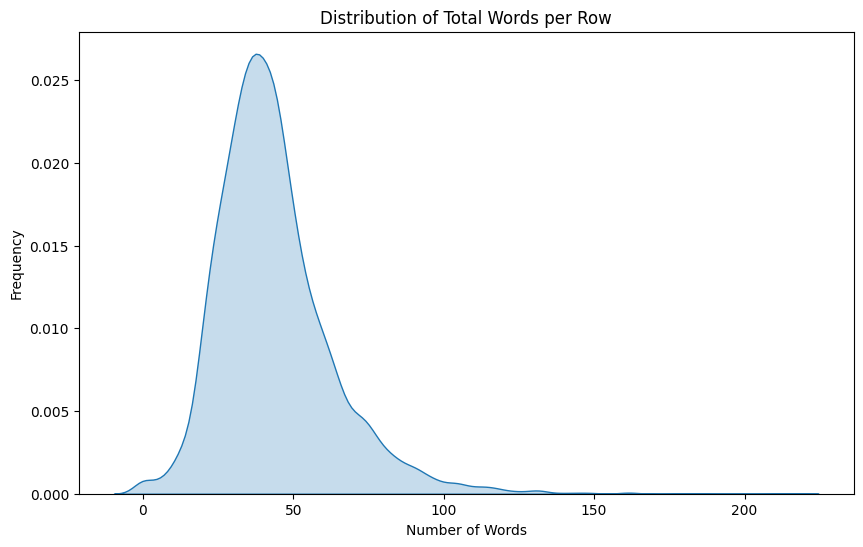

In [157]:
# Calculate number of words in each of the four text fields per row
df['word_count'] = df[['comparision', 'impression', 'findings', 'indication']].agg(lambda row: sum(len(str(cell).split()) for cell in row), axis=1)


plt.figure(figsize=(10, 6))
sns.kdeplot(df['word_count'], fill = True)
plt.title("Distribution of Total Words per Row")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


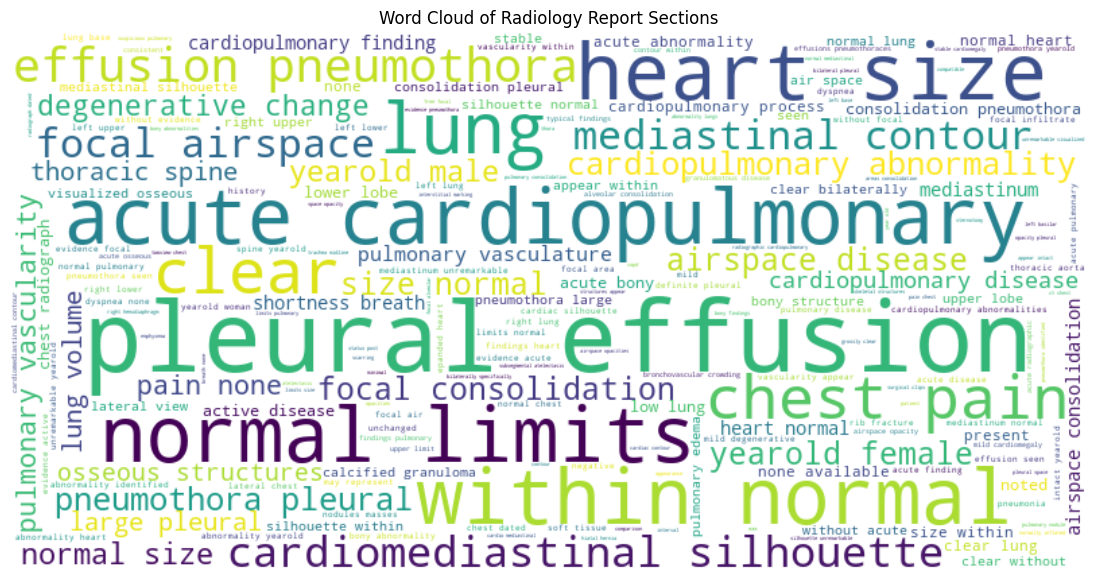

In [158]:
from wordcloud import WordCloud

# Combine all text from the four columns
all_text = " ".join(df[['comparision', 'impression', 'findings', 'indication']].agg(' '.join, axis=1))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Radiology Report Sections")
plt.show()


In [159]:
chest_xray_types = df['caption'].unique()
print((chest_xray_types))


['and lateral chest . ' 'and lateral chest' 'and lateral chest dated'
 'ray chest and lateral' 'chest' 'and lateral chest dated p . m . '
 'and lateral chest for comparison' 'lateral chest images time'
 'and lateral views chest performed' 'and lateral views the chest dated'
 'lateral views the chest dated'
 'and lateral chest radiograph views images'
 'portable radiograph the chest single view portable view . '
 'and lateral chest .  hours' 'chest and lateral' 'views chest'
 'chest radiographs and lateral' 'and lateral the chest'
 'twoview chest .  hours'
 'history cancer .  evaluate for metastatic disease eamination and lateral chest no comparison'
 'and lateral chest time with comparison'
 'and lateral chest radiograph p . m . ' 'and lateral chest hours . '
 'and lat view chest' 'twoview chest hours . '
 'and lateral chest dated a . m . ' 'chest views' 'chest view'
 'and lateral chest with comparison report from which normal the comparison film from'
 'radiograph chest and lateral' '

In [160]:
def show_image_captions(df, sample=3):
    """
    For each sampled image ID prefix (base_id), display all associated images with captions.
    """
    # Create base_id by removing the last part of the image_id
    df['base_id'] = df['image_id'].apply(lambda x: "-".join(x.split('-')[:-1]))

    # Get all base_ids with at least one associated image
    unique_base_ids = df['base_id'].unique()
    sampled_base_ids = unique_base_ids[:sample]

    for i, base_id in enumerate(sampled_base_ids, 1):
        group = df[df['base_id'] == base_id]
        n_images = len(group)

        plt.figure(figsize=(6 * n_images, 6))

        for j, (_, row) in enumerate(group.iterrows()):
            image_path = os.path.join("./", row['image_path'])
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if image is not None else None

            if image is not None:
                plt.subplot(1, n_images, j + 1)
                plt.imshow(image, aspect='auto')
                plt.title(row['image_id'])

        plt.tight_layout()
        plt.show()

        # Just print metadata from the first row, assuming it's shared across the pair/group
        first_row = group.iloc[0]
        print(f"{i}) Base ID: {base_id}")
        print("Comparison:", first_row['comparision'])
        print("Indication:", first_row['indication'])
        print("Findings:", first_row['findings'])
        print("Impression:", first_row['impression'])
        print("\n" + "*" * 150 + "\n")
        

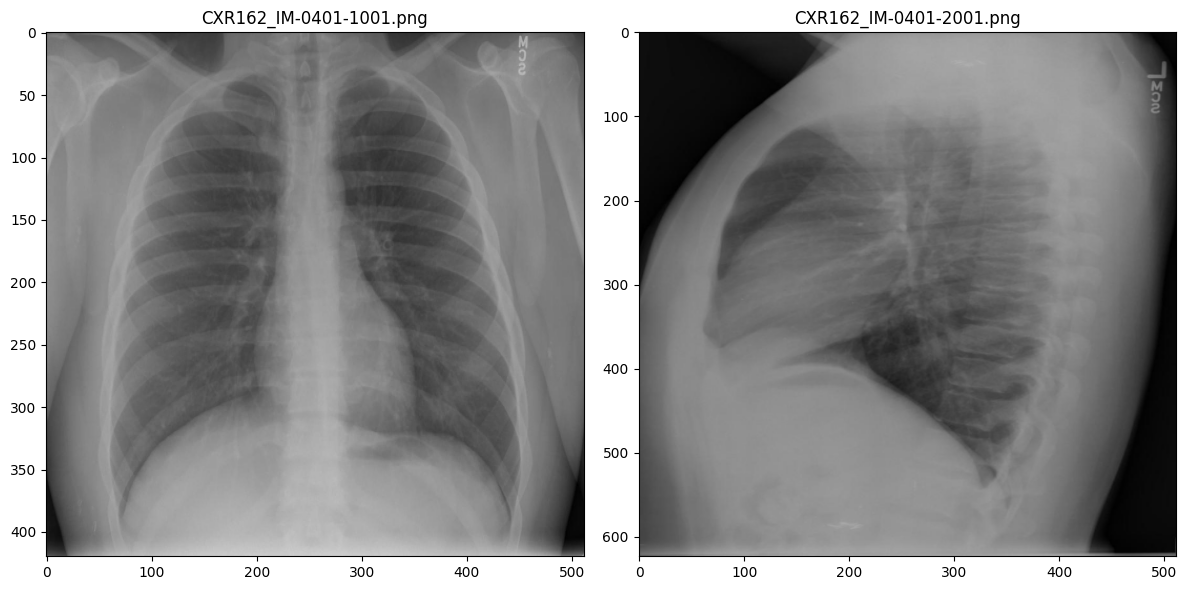

1) Base ID: CXR162_IM-0401
Comparison: none . 
Indication: 
Findings: heart size normal .  lungs are clear .  are normal .  no pneumonia effusions edema pneumothora adenopathy nodules masses . 
Impression: normal chest

******************************************************************************************************************************************************



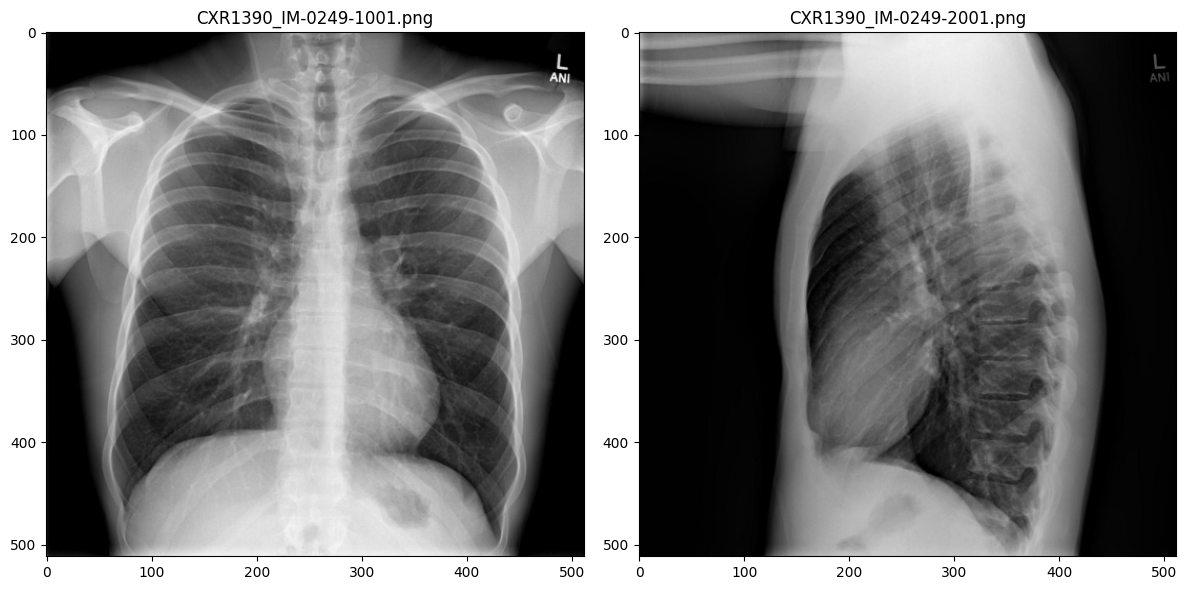

2) Base ID: CXR1390_IM-0249
Comparison: none
Indication: slipped back right side
Findings: the heart size and pulmonary vascularity appear within normal limits .  lungs are free focal airspace disease .  no pleural effusion pneumothora seen .  shunt tubing identified .  the bony structures visualized appear unremarkable . 
Impression: no evidence active disease . 

******************************************************************************************************************************************************



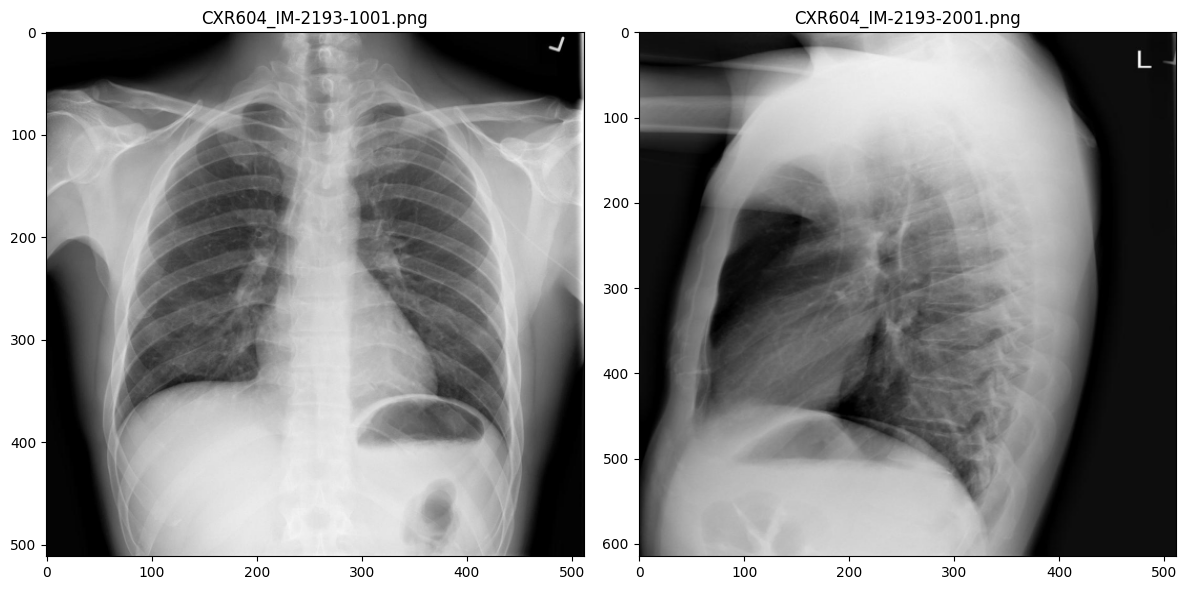

3) Base ID: CXR604_IM-2193
Comparison: 
Indication: bone marrow transplant evaluation .  aml . 
Findings: the heart size and pulmonary vascularity appear within normal limits .  the lungs are free focal airspace disease .  no pleural effusion pneumothora seen .  picc line the tip the upper right atrium . 
Impression: no evidence active disease . 

******************************************************************************************************************************************************



In [161]:
show_image_captions(df)

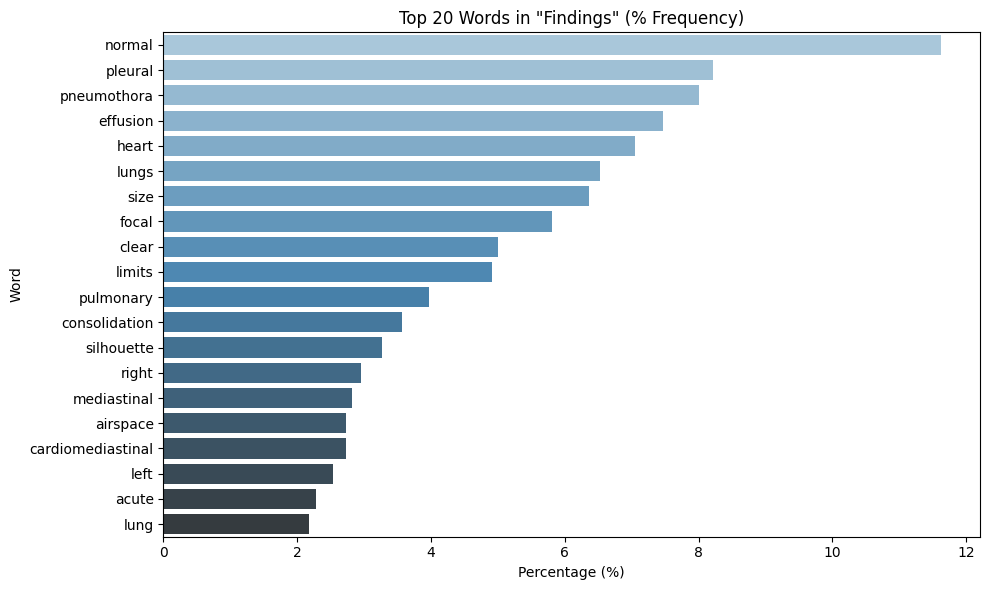

In [162]:
# Vectorize the 'findings' column
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['findings'].dropna())

# Sum total counts for each word
word_counts = X.toarray().sum(axis=0)
word_list = vectorizer.get_feature_names_out()

# Convert to percentages
total_words = word_counts.sum()
word_percentages = 100 * word_counts / total_words

# Create a DataFrame for plotting
word_df = pd.DataFrame({
    'Word': word_list,
    'Percentage': word_percentages
}).sort_values(by='Percentage', ascending=False)

# Plot as a percentage bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Word', data=word_df, palette='Blues_d')
plt.title('Top 20 Words in "Findings" (% Frequency)')
plt.xlabel('Percentage (%)')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

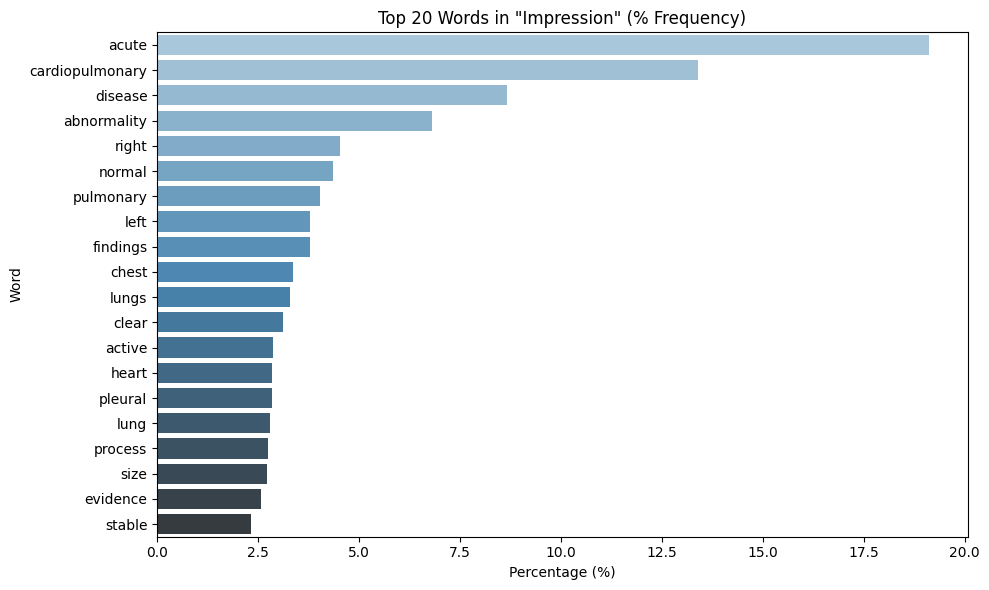

In [163]:
# Vectorize the 'findings' column
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['impression'].dropna())

# Sum total counts for each word
word_counts = X.toarray().sum(axis=0)
word_list = vectorizer.get_feature_names_out()

# Convert to percentages
total_words = word_counts.sum()
word_percentages = 100 * word_counts / total_words

# Create a DataFrame for plotting
word_df = pd.DataFrame({
    'Word': word_list,
    'Percentage': word_percentages
}).sort_values(by='Percentage', ascending=False)

# Plot as a percentage bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Word', data=word_df, palette='Blues_d')
plt.title('Top 20 Words in "Impression" (% Frequency)')
plt.xlabel('Percentage (%)')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

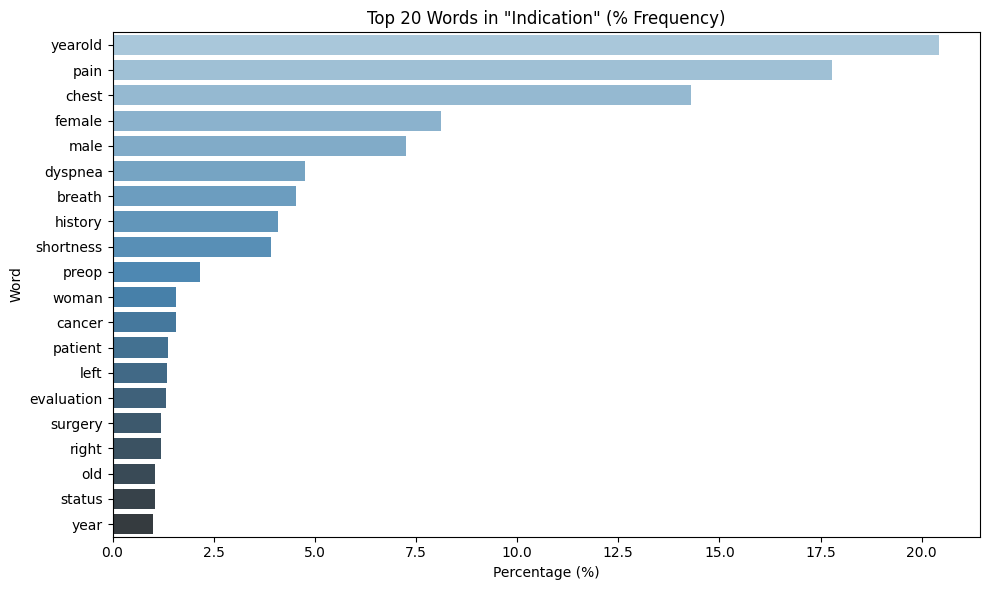

In [164]:
# Vectorize the 'findings' column
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['indication'].dropna())

# Sum total counts for each word
word_counts = X.toarray().sum(axis=0)
word_list = vectorizer.get_feature_names_out()

# Convert to percentages
total_words = word_counts.sum()
word_percentages = 100 * word_counts / total_words

# Create a DataFrame for plotting
word_df = pd.DataFrame({
    'Word': word_list,
    'Percentage': word_percentages
}).sort_values(by='Percentage', ascending=False)

# Plot as a percentage bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Word', data=word_df, palette='Blues_d')
plt.title('Top 20 Words in "Indication" (% Frequency)')
plt.xlabel('Percentage (%)')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

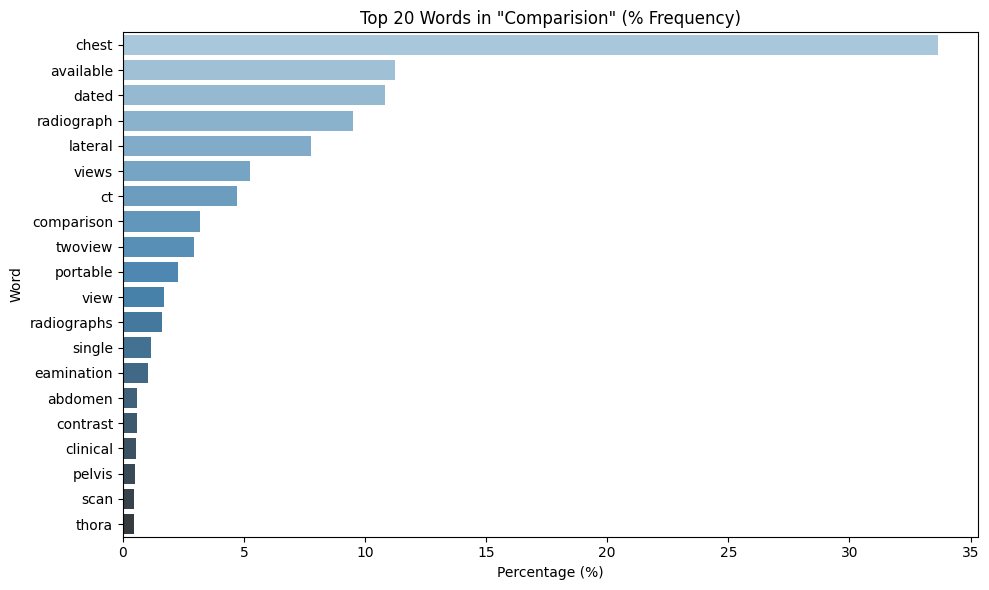

In [165]:
# Vectorize the 'findings' column
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['comparision'].dropna())

# Sum total counts for each word
word_counts = X.toarray().sum(axis=0)
word_list = vectorizer.get_feature_names_out()

# Convert to percentages
total_words = word_counts.sum()
word_percentages = 100 * word_counts / total_words

# Create a DataFrame for plotting
word_df = pd.DataFrame({
    'Word': word_list,
    'Percentage': word_percentages
}).sort_values(by='Percentage', ascending=False)

# Plot as a percentage bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Word', data=word_df, palette='Blues_d')
plt.title('Top 20 Words in "Comparision" (% Frequency)')
plt.xlabel('Percentage (%)')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

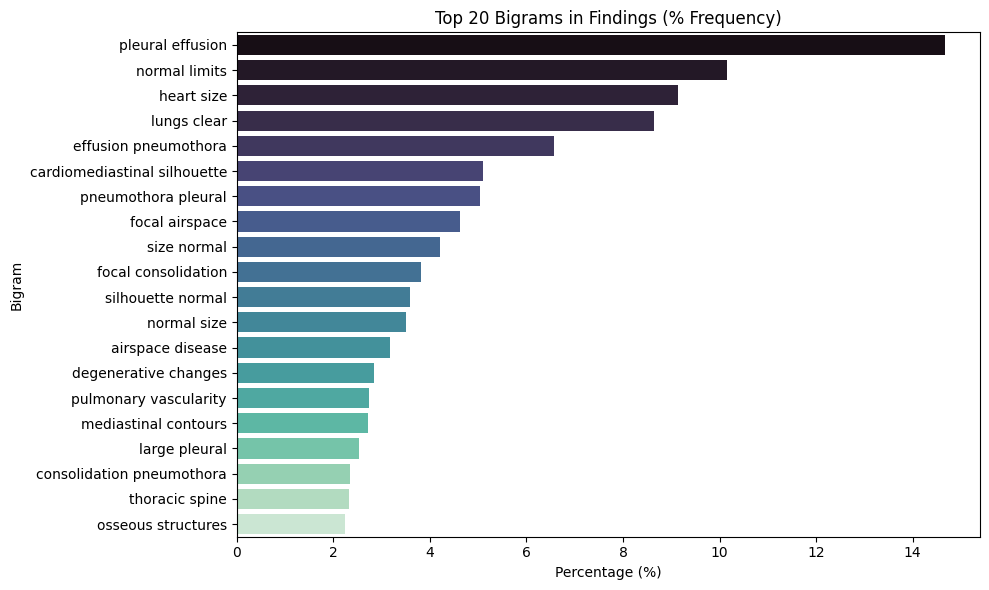

In [166]:
# Vectorize bigrams
vec = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
X = vec.fit_transform(df['findings'].dropna())

# Extract bigram counts and names
counts = X.sum(axis=0).A1
ngrams = vec.get_feature_names_out()

# Convert to percentage
total_bigrams = counts.sum()
percentages = 100 * counts / total_bigrams

# Prepare DataFrame
bigram_df = pd.DataFrame({
    'Bigram': ngrams,
    'Percentage': percentages
}).sort_values(by='Percentage', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Bigram', data=bigram_df, palette='mako')
plt.title("Top 20 Bigrams in Findings (% Frequency)")
plt.xlabel("Percentage (%)")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()

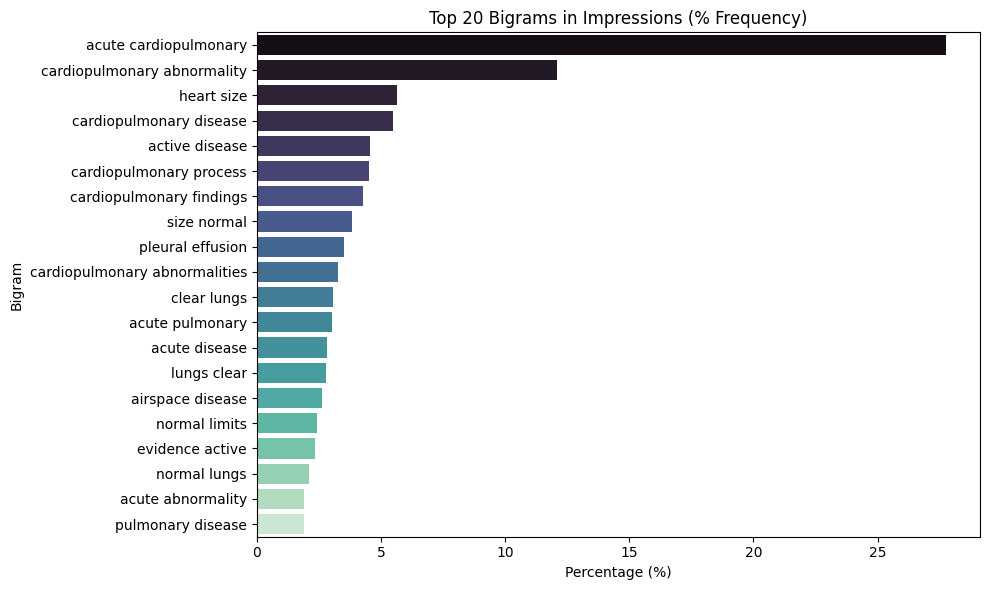

In [167]:
# Vectorize bigrams
vec = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
X = vec.fit_transform(df['impression'].dropna())

# Extract bigram counts and names
counts = X.sum(axis=0).A1
ngrams = vec.get_feature_names_out()

# Convert to percentage
total_bigrams = counts.sum()
percentages = 100 * counts / total_bigrams

# Prepare DataFrame
bigram_df = pd.DataFrame({
    'Bigram': ngrams,
    'Percentage': percentages
}).sort_values(by='Percentage', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Bigram', data=bigram_df, palette='mako')
plt.title("Top 20 Bigrams in Impressions (% Frequency)")
plt.xlabel("Percentage (%)")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()

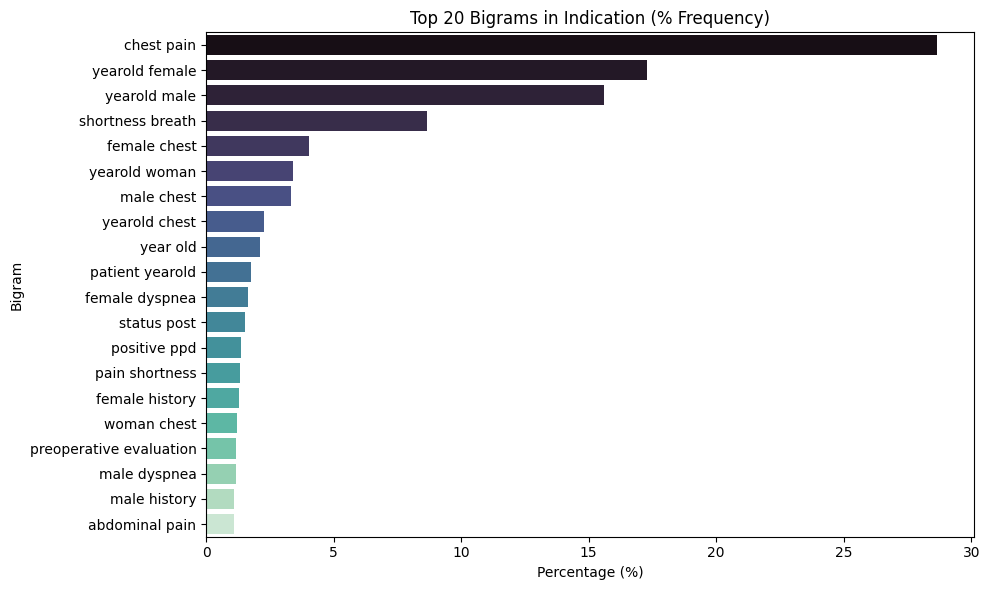

In [168]:
# Vectorize bigrams
vec = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
X = vec.fit_transform(df['indication'].dropna())

# Extract bigram counts and names
counts = X.sum(axis=0).A1
ngrams = vec.get_feature_names_out()

# Convert to percentage
total_bigrams = counts.sum()
percentages = 100 * counts / total_bigrams

# Prepare DataFrame
bigram_df = pd.DataFrame({
    'Bigram': ngrams,
    'Percentage': percentages
}).sort_values(by='Percentage', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Bigram', data=bigram_df, palette='mako')
plt.title("Top 20 Bigrams in Indication (% Frequency)")
plt.xlabel("Percentage (%)")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()

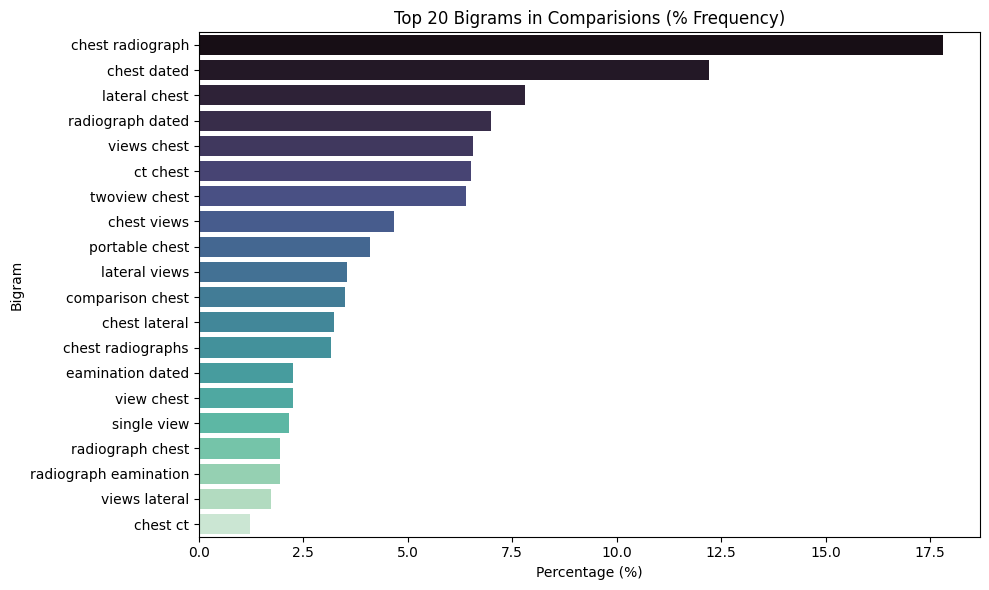

In [169]:
# Vectorize bigrams
vec = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
X = vec.fit_transform(df['comparision'].dropna())

# Extract bigram counts and names
counts = X.sum(axis=0).A1
ngrams = vec.get_feature_names_out()

# Convert to percentage
total_bigrams = counts.sum()
percentages = 100 * counts / total_bigrams

# Prepare DataFrame
bigram_df = pd.DataFrame({
    'Bigram': ngrams,
    'Percentage': percentages
}).sort_values(by='Percentage', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage', y='Bigram', data=bigram_df, palette='mako')
plt.title("Top 20 Bigrams in Comparisions (% Frequency)")
plt.xlabel("Percentage (%)")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()

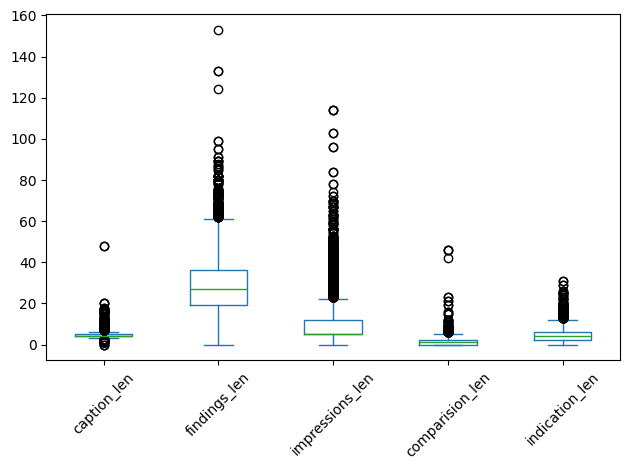

In [170]:
df['caption_len'] = df['caption'].str.split().apply(len)
df['findings_len'] = df['findings'].str.split().apply(len)
df['impressions_len'] = df['impression'].str.split().apply(len)
df['comparision_len'] = df['comparision'].str.split().apply(len)
df['indication_len'] = df['indication'].str.split().apply(len)
df[['caption_len', 'findings_len', 'impressions_len', 'comparision_len', 'indication_len']].plot(kind='box')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


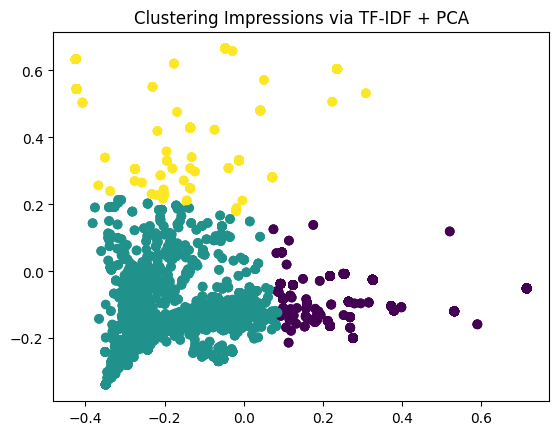

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

vec = TfidfVectorizer(stop_words='english', max_features=500)
X = vec.fit_transform(df['impression'].dropna())

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

kmeans = KMeans(n_clusters=3).fit(X_reduced)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=kmeans.labels_, cmap='viridis')
plt.title("Clustering Impressions via TF-IDF + PCA")
plt.show()

labels = kmeans.fit_predict(X_reduced)

# Add labels back to original DataFrame
df['cluster_label'] = labels


In [172]:
df.head()

,image_id,caption,comparision,indication,findings,impression,height,width,image_path,word_count,base_id,caption_len,findings_len,impressions_len,comparision_len,indication_len,cluster_label
0,CXR162_IM-0401-1001.png,and lateral chest .,none .,,heart size normal . lungs are clear . are no...,normal chest,420,512,NLMCXR_png/CXR162_IM-0401-1001.png,24,CXR162_IM-0401,4,20,2,2,0,1
1,CXR162_IM-0401-2001.png,and lateral chest .,none .,,heart size normal . lungs are clear . are no...,normal chest,624,512,NLMCXR_png/CXR162_IM-0401-2001.png,24,CXR162_IM-0401,4,20,2,2,0,1
2,CXR1390_IM-0249-1001.png,and lateral chest,none,slipped back right side,the heart size and pulmonary vascularity appea...,no evidence active disease .,512,512,NLMCXR_png/CXR1390_IM-0249-1001.png,45,CXR1390_IM-0249,3,35,5,1,4,2
3,CXR1390_IM-0249-2001.png,and lateral chest,none,slipped back right side,the heart size and pulmonary vascularity appea...,no evidence active disease .,512,512,NLMCXR_png/CXR1390_IM-0249-2001.png,45,CXR1390_IM-0249,3,35,5,1,4,2
4,CXR604_IM-2193-1001.png,and lateral chest dated,,bone marrow transplant evaluation . aml .,the heart size and pulmonary vascularity appea...,no evidence active disease .,512,512,NLMCXR_png/CXR604_IM-2193-1001.png,46,CXR604_IM-2193,4,34,5,0,7,2


Text(0.5, 1.0, 'Similarity between first 10 captions')

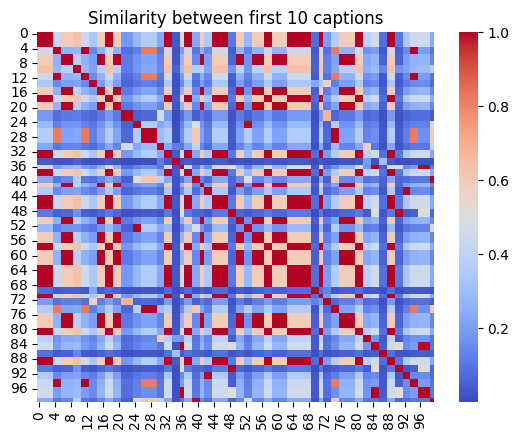

In [173]:
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['caption'].dropna())
similarity_matrix = cosine_similarity(X)

sns.heatmap(similarity_matrix[:100, :100], cmap='coolwarm')
plt.title("Similarity between first 10 captions")
